In [1]:
# Parameters
global_seed = 88
save_results = False
benchmark_settings = {"benchmark_name": "pMNIST", "difficulty": "easy", "num_tasks": 3, "train_percentage": 0.1, "num_val_benchmarks": 3, "batch_size": 256}
method_settings = {"method_name": "GroHess", "grow_from": "output", "hessian_percentile": 95, "grad_percentile": 95, "num_inputs": 784, "num_hidden_root": 100, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 2, "lr": [5e-05, 0.002], "num_epochs": [2, 4]}
visualization_settings = {"savefig": False, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": False, "visualize_val_accs_matrix": False, "visualize_accuracy_through_benchmarks": True, "visualize_violin": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 2,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 4)}

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
print("#########################################")
print(type(HPO_settings["lr"][0]))
print("#########################################")

#########################################
<class 'float'>
#########################################


In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib/benchmark_loaders")

path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [6]:
device = get_device(1)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-05 14:59:06,662] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:00<00:01,  1.15it/s]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:01<00:00,  1.26it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.28it/s]

[I 2024-07-05 14:59:15,377] Trial 0 finished with value: 78.0596666666667 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 78.0596666666667.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

[I 2024-07-05 14:59:24,523] Trial 1 finished with value: 82.08480952380951 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 1 with value: 82.08480952380951.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

[I 2024-07-05 14:59:30,886] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:00<00:01,  1.39it/s]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:01<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]

[I 2024-07-05 14:59:45,669] Trial 0 finished with value: 87.22466666666665 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 87.22466666666665.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

[I 2024-07-05 15:00:01,102] Trial 1 finished with value: 87.76023809523812 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 1 with value: 87.76023809523812.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.31it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.34it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.36it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]

[I 2024-07-05 15:00:07,557] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/3 [00:00<?, ?it/s]

 33%|██████████████████████████████████████▎                                                                            | 1/3 [00:00<00:01,  1.39it/s]

 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 2/3 [00:01<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]

[I 2024-07-05 15:00:28,637] Trial 0 finished with value: 89.05900000000001 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 89.05900000000001.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

[I 2024-07-05 15:00:50,316] Trial 1 finished with value: 89.2842222222222 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 4}. Best is trial 1 with value: 89.2842222222222.


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

## Visualize results

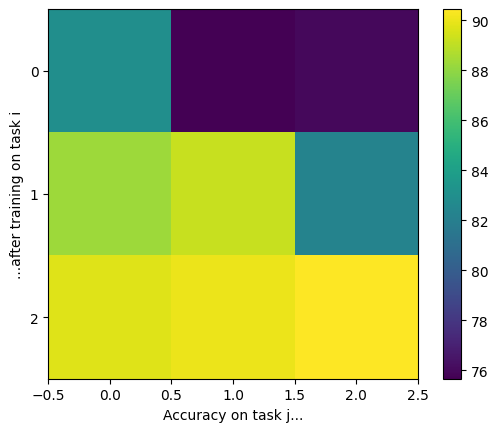

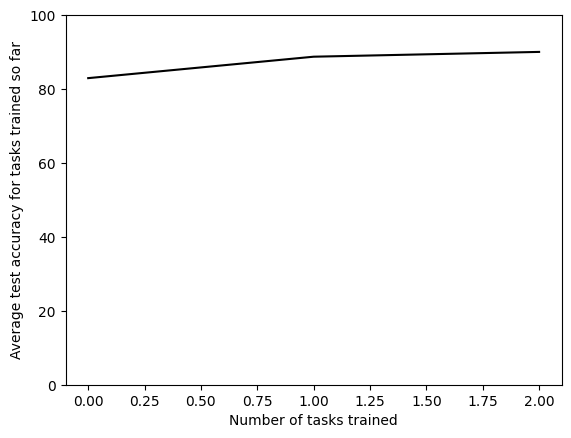

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
val_accs_matrix = validate(benchmarks_list, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.37it/s]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.37it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


--------------------------------------------------
LEARNING TASK 2


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


--------------------------------------------------
LEARNING TASK 3


  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 25%|████████████████████████████▊                                                                                      | 1/4 [00:00<00:02,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 50%|█████████████████████████████████████████████████████████▌                                                         | 2/4 [00:01<00:01,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:02<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]

## Visualize validation

In [11]:
test_accs_matrix

array([[82.95, 75.67, 75.98],
       [88.28, 89.22, 82.25],
       [89.69, 90.01, 90.44]])

In [12]:
val_accs_matrix

array([[90.2 , 90.35, 90.61],
       [90.49, 90.42, 91.  ],
       [90.19, 90.3 , 90.7 ],
       [90.22, 90.44, 90.47]])

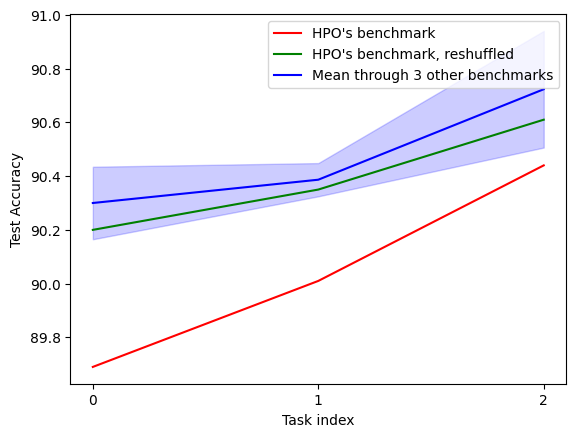

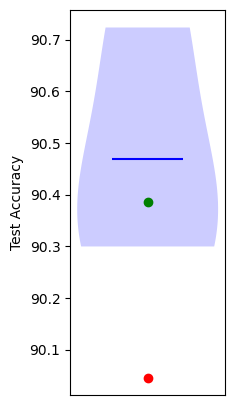

In [13]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [14]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)